<div dir='rtl' id="NumPy">
<h1>
مصور سازی
</h1>
</div>

<div dir="rtl">
<h2>
برسی ابتدایی دیتاست
 </h2>
</div>
<hr/>

<div dir='rtl'>در اولین گام مقداری از داده را چاپ میکنیم تا یک دید اولیه نسبت به داده داشته باشیم</div>

In [1]:
import pandas as pd

firstDf = pd.read_csv('ferdowsi-data.txt',names = ['col1'])
firstDf

,col1
0,{
1,"""_score"": 1.0"
2,"""_index"": ""newsvit"""
3,"""_source"": {"
4,"""content"": "" \u0641\u0647\u06cc\u0645\u064..."
...,...
19588746,"""category"": ""15"""
19588747,}
19588748,"""_type"": ""news"""
19588749,"""_id"": ""2577048"""


<div dir='rtl'>اگر دقت کنیم هر 16 خط از فایل تکست یک سطر خبری را برای ما تشکیل میدهد پس با همین الگوریتم 1000 خط اول را به صورت دیتا فریم در می آوریم(اگر دقت کنید متوجه میشویم که دیتا ست ما دارای 19588751 سطر است) 
</div> 

In [2]:
import pandas as pd 
# creating some main DataFrame
mainDf = pd.DataFrame()
with open("ferdowsi-data.txt") as myfile:
    # because we need first 10000 lines, then we have --> 10000/16 == 625
    for i in range(625):
        string =""
        k = 16 * i
        for j in range(k, k + 16):
            string += next(myfile)
        # create a temporary DataFrame
        x = pd.DataFrame(eval(string,{"false":False}))# in case if there was a bad input(chnage 'false' to False)
        # convertin some rows to column
        xT = x.T
        xT["_score"] = xT.loc["_score", "agency"]
        xT["_index"] = xT.loc["_index", "agency"]
        xT["_type"] = xT.loc["_type", "agency"]
        xT["_id"] = xT.loc["_id", "agency"]
        xT = xT.drop(["_score", "_index", "_type", "_id"])
        xT = xT.set_index("_id")
        mainDf = mainDf.append(xT)
mainDf


,agency,category,content,date_created,image,lead,title,url,_score,_index,_type
_id,,,,,,,,,,,
2981643,13,15,فهیمه حسن‌میری: اگرچه در هیاهوی انتخابات ریاس...,1494518193,uploads/2017/05/11/1589793661.jpg,جامعه&nbsp;&gt;&nbsp;شهری - میزگردی درباره عمل...,کارهای قالیباف در تهران نمایشی بود- شورای‌شهر ...,http://www.khabaronline.ir/(X(1)S(bud4wg3ebzbx...,1.0,newsvit,news
2981951,1,20,به گزارش خبرگزاری فارس از قم، محمدعلی برزنونی ...,1494521817,uploads/2017/05/11/1713799235.jpg,مدیر مؤسسه علمی و پژوهشی ابن‌سینا در بوسنی گفت...,معنویت در عصر آخرالزمان احیا می‌شود,http://www.farsnews.com/13960221001386,1.0,newsvit,news
2981938,36,5,به گزارش ایرنا، تیم های تراکتورسازی تبریز و...,1494521741,uploads/2017/05/11/2561366787.jpg,تهران - ایرنا - دیدار پایانی جام حذفی باشگاه ه...,فینال جام حذفی؛ وداع البرز حاجی پور از داوری-3...,http://www.irna.ir/fa/News/82525960/,1.0,newsvit,news
2981979,13,8,به گزارش خبرگزاری خبرآنلاین، جمشید مشایخی، هن...,1494522037,uploads/2017/05/11/109987278.jpg,فرهنگ&nbsp;&gt;&nbsp;سینما - جمشید مشایخی، امر...,موضع انتخاباتی جمشید مشایخی روی تخت بیمارستان-...,http://www.khabaronline.ir/(X(1)S(nducmtisxqhw...,1.0,newsvit,news
2981962,13,7,به گزارش خبرآنلاین، پیش‌تر گفته شد سامسونگ و ...,1494521914,uploads/2017/05/11/3295317773.jpg,فناوری اطلاعات&nbsp;&gt;&nbsp;سخت افزار - اسنپ...,مشخصات فنی پردازنده اسنپ دراگون ۸۴۵- رونمایی ا...,http://www.khabaronline.ir/(X(1)S(uupfbn0kvlth...,1.0,newsvit,news
...,...,...,...,...,...,...,...,...,...,...,...
2994085,13,8,غالب علمای عامه - چه متعصب و چه منصف - ضمن بی...,1494651554,uploads/2017/05/13/3589087142.jpg,فرهنگ&nbsp;&gt;&nbsp;دین و اندیشه - متن زیر گز...,آیا امام زمان(عج) از جایی به نام سرداب ظهور می...,http://www.khabaronline.ir/(X(1)S(wgxv0s4mqfqj...,1.0,newsvit,news
2994092,8,5,نفت تهران با پیروزی برابر تراکتورسازی پس از ی...,1494651591,False,به این ترتیب دو تیم پرسپولیس و نفت تهران مستقی...,معادلات چهارسهمیه ایران در لیگ قهرمانان سال آینده,http://www.tabnak.ir/fa/news/693524/%D9%85%D8%...,1.0,newsvit,news
2994086,28,74,مدیرکل استاندارد استان زنجان گفت: 70 ف...,1494651561,,,صدور 70 فقره پروانه کاربرد علامت استاندارد اجب...,http://zanjan.isna.ir../../default.aspx?NSID=5...,1.0,newsvit,news


<div dir='rtl'>عالی!
برخی از ستون ها مثل، تایپ یا اسکور یا اندکس به خاطر این که کاملا یکی هستند برای ما خیلی کارایی ندارند ولی فعلا باهاشون کاری نداریم...</div> 

<div dir='rtl'>حال وقتشه بریم سراغ نگاشت شماره دسته بندی تا یکم مرتبش کنیم.  </div> 

<div dir='rtl'>داده ها با سمیکالن از هم شدا شده بودن و ستون ها اسمی نداشتن، پس باید دست به کار شیم و خودمون کمی تغییرش بدیم. :)))  </div> 

In [3]:
# seprating with ';'
cateDf = pd.read_csv("categories.csv",sep = ';')
# name columns
cateDf.loc[-1,:] = cateDf.columns
cateDf.index += 1
cateDf.sort_index(inplace = True)
cateDf.columns=['id', 'b','c', 'd']
cateDf = cateDf.astype({'id': int})
cateDf.set_index('id', inplace = True)
# take a look at data frame
cateDf

,b,c,d
id,,,
1,سیاسی,2016-02-29 15:22:59,2016-02-29 15:27:23
5,ورزشی,2016-05-31 13:57:29,2016-05-31 13:57:29
7,فناوری اطلاعات,2016-06-12 18:53:52,2016-06-12 18:53:52
8,فرهنگی,2016-06-12 18:54:10,2016-06-12 18:54:10
9,اقتصادی,2016-06-14 11:02:22,2016-06-14 11:02:22
...,...,...,...
127,مناطق,2018-05-09 12:16:57,2018-05-09 12:16:57
128,اخبار کوتاه,2018-05-09 13:04:54,2018-05-09 13:04:54
129,بازار,2018-05-12 13:20:44,2018-05-12 13:20:44


<div dir="rtl">
<h2>
پر تکرار ترین خبر ها !! </h2>
</div>
<hr/>

<div dir='rtl'>ابتدا پیدا میکنیم که پرتکرار ترین خبر ها کدام هستند.</div>

In [4]:
n = 10
mostRep = mainDf['category'].value_counts()[:n].index.tolist()
mostRep

['9', '1', '10', '5', '20', '8', '15', '79', '7', '32']

<div dir='rtl'>بهترین نموداری که میتونه به خوبی این آمار را بیان کنه و با مخاطب ارتباط برقرار کنه نمودار دایره ای(pie chart) . هست که با استفاده از کتابخانه متپلات این نمودار را رسم میکنیم </div>

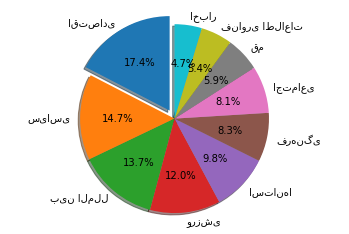

In [5]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =  cateDf.loc[int(mostRep[0]), 'b'] , cateDf.loc[int(mostRep[1]), 'b'], cateDf.loc[int(mostRep[2]), 'b'], cateDf.loc[int(mostRep[3]), 'b'], cateDf.loc[int(mostRep[4]), 'b'], cateDf.loc[int(mostRep[5]), 'b'], cateDf.loc[int(mostRep[6]), 'b'], cateDf.loc[int(mostRep[7]), 'b'], cateDf.loc[int(mostRep[8]), 'b'], cateDf.loc[int(mostRep[9]), 'b']
# count how many times a category repeated
counts = mainDf['category'].value_counts()
total = counts[mostRep[0]] + counts[mostRep[1]] + counts[mostRep[2]] + counts[mostRep[3]] + counts[mostRep[4]] + counts[mostRep[5]] + counts[mostRep[6]] + counts[mostRep[7]] + counts[mostRep[8]] + counts[mostRep[9]] 
sizes = [counts[mostRep[0]]*10/total, counts[mostRep[1]]*10/total, counts[mostRep[2]]*10/total, counts[mostRep[3]]*10/total, counts[mostRep[4]]*10/total, counts[mostRep[5]]*10/total, counts[mostRep[6]]*10/total, counts[mostRep[7]]*10/total, counts[mostRep[8]]*10/total, counts[mostRep[9]]*10/total,]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
# in case if we need tilte --> plt.title('Abundance by subject %') 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# show the chart
plt.show()

<div dir='rtl'>مییبنیم که به خوبی همه داده ها رو میشه از روی نمودار برسی کرد و متوجه شد پرتکرار ترین خبر ها اقتصادی است( فقط باید از آخر به اول بخونیم که مشکل بزرگی فکر نکنم باشه :)))) )</div>

<div dir="rtl">
<h2>
فراوانی داده ها نسبت به زمان.
</h2>
</div>
<hr/>

<div dir='rtl'>اولین مشکلی که با آن بر میخوریم این است که فرمت زمان داده شده برای تایم انتشار مقاله ها یونکس تایم ایتمپ هست(unix timestamp) که به راحتی میشه اونو تبدیل به فمت مورد نظر کرد با کتابخانه دیت تیام(datetime). </div>

<div dir='rtl'>اما ابتدا لازم است کل دیتا ست را لود کنیم... </div>

<div dir='rtl'>اما نکته ای که وجود دارد این است که لود کردن تمام دیتا بسیار کار طولانی غیر قابل تحملی است. کاری که ما میکنیم این است که صرفا زمان انتشار خبر ها را در یک لیست سیو میکنیم و از آن لیست استفاده میکنیم </div>

In [6]:
import pandas as pd
rawDf = pd.read_csv('ferdowsi-data.txt',names = ['col1', 'col2', 'col3'], sep = ':',nrows=19588751)
rawDf

,col1,col2,col3
0,{,NaN,NaN
1,"""_score""","1.0,",NaN
2,"""_index""","""newsvit"",",NaN
3,"""_source""",{,NaN
4,"""content""",""" \u0641\u0647\u06cc\u0645\u0647 \u062d\u0633...",\u0627\u06af\u0631\u0686\u0647 \u062f\u0631 \...
...,...,...,...
19580628,"""category""","""15""",NaN
19580629,"},",NaN,NaN
19580630,"""_type""","""news"",",NaN
19580631,"""_id""","""2577048""",NaN


<div dir='rtl'>حال سطر های اضافی را حذف میکنیم و فقط آنهایی را که به زمان انتشار مربوط است نگه میداریم </div>

In [8]:
dates = []
index = list(rawDf.index)
for i in range(len(index)):
    if( "date_created" in rawDf.loc[i, 'col1']):
        dates.append(rawDf.loc[i, 'col2'])
dates

[' 1494518193,',
 ' 1494521817,',
 ' 1494521741,',
 ' 1494522037,',
 ' 1494521914,',
 ' 1494521902,',
 ' 1494521910,',
 ' 1494521805,',
 ' 1494521544,',
 ' 1494521895,',
 ' 1494526684,',
 ' 1494526674,',
 ' 1494526673,',
 ' 1494526735,',
 ' 1494526643,',
 ' 1494526739,',
 ' 1494526737,',
 ' 1494526670,',
 ' 1494526501,',
 ' 1494527611,',
 ' 1494527999,',
 ' 1494527607,',
 ' 1494527908,',
 ' 1494528001,',
 ' 1494527620,',
 ' 1494527961,',
 ' 1494527815,',
 ' 1494527889,',
 ' 1494532901,',
 ' 1494532902,',
 ' 1494533627,',
 ' 1494533566,',
 ' 1494533616,',
 ' 1494533619,',
 ' 1494532782,',
 ' 1494533613,',
 ' 1494533561,',
 ' 1494533635,',
 ' 1494539032,',
 ' 1494539624,',
 ' 1494539008,',
 ' 1494539026,',
 ' 1494539010,',
 ' 1494538802,',
 ' 1494539629,',
 ' 1494538841,',
 ' 1494539643,',
 ' 1494551700,',
 ' 1494551913,',
 ' 1494551671,',
 ' 1494551717,',
 ' 1494551722,',
 ' 1494551702,',
 ' 1494551677,',
 ' 1494551698,',
 ' 1494551632,',
 ' 1494566070,',
 ' 1494566071,',
 ' 1494566109,

<div dir='rtl'>بهتر از این نمیشه !! :))) </div>

<div dir='rtl'>حال تنها کاری که مونده اینه که لیست رو سورت کنیم و کاما های اخر هر تاریخ رو پاپ کنیم و تبدیل به تاریخ های قابل خوندن بکنیم </div>

In [9]:
import datetime
import numpy as np

dates.sort()
for i in range(len(dates)):
    dates[i] = int(dates[i].replace(",", ""))

for i in range(len(dates)):
    timestamp = datetime.datetime.fromtimestamp(dates[i])
    dates[i] = timestamp.strftime('%Y-%m-%d')
    
datesN = np.array(dates)
unique, counts = np.unique(datesN, return_counts=True)
datesN = dict(zip(unique, counts))
datesN

{'2017-02-17': 5934,
 '2017-02-18': 7820,
 '2017-02-19': 10474,
 '2017-02-20': 9678,
 '2017-02-21': 9724,
 '2017-02-22': 9851,
 '2017-02-23': 5260,
 '2017-02-24': 6174,
 '2017-02-25': 9211,
 '2017-02-26': 9249,
 '2017-02-27': 9482,
 '2017-02-28': 9862,
 '2017-03-01': 8983,
 '2017-03-02': 5581,
 '2017-03-03': 5198,
 '2017-03-04': 8903,
 '2017-03-05': 8759,
 '2017-03-06': 7788,
 '2017-03-07': 8513,
 '2017-03-08': 8482,
 '2017-03-09': 8059,
 '2017-03-10': 5204,
 '2017-03-11': 8260,
 '2017-03-12': 8294,
 '2017-03-13': 8325,
 '2017-03-14': 8111,
 '2017-03-15': 7613,
 '2017-03-16': 5403,
 '2017-03-17': 4612,
 '2017-03-18': 5611,
 '2017-03-19': 4602,
 '2017-03-20': 4250,
 '2017-03-21': 4591,
 '2017-03-22': 4564,
 '2017-03-23': 4541,
 '2017-03-24': 4736,
 '2017-03-25': 5391,
 '2017-03-26': 5305,
 '2017-03-27': 4968,
 '2017-03-28': 4974,
 '2017-03-29': 4859,
 '2017-03-30': 4523,
 '2017-03-31': 4298,
 '2017-04-01': 4405,
 '2017-04-02': 3913,
 '2017-04-03': 7502,
 '2017-04-04': 7465,
 '2017-04-05

<div dir='rtl'>اکنون بازه ها را به بازه های کوچک تر تبدیل میکنیم تا بهتر رو نمودار نمایش داده شود </div>

In [10]:
datesNew = {'2017-03': 0, '2017-04': 0, '2017-05': 0, '2017-06': 0}
for x, y in datesN.items():
    if('2017-03' in x):
        datesNew['2017-03'] += y
    if('2017-04' in x):
        datesNew['2017-04'] += y
    if('2017-05' in x):
        datesNew['2017-05'] += y
    if('2017-06' in x):
        datesNew['2017-06'] += y
datesNew

{'2017-03': 193301, '2017-04': 229868, '2017-05': 388608, '2017-06': 309137}

<div dir='rtl'>نمودار خطی را میسازیم </div>

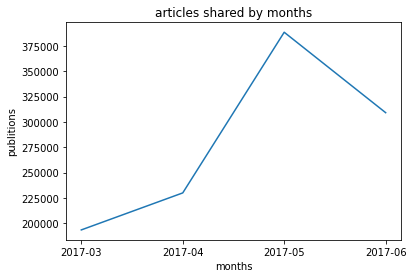

In [12]:
import matplotlib.pyplot as plt
months = []
publition = []

for x, y in datesNew.items():
    months.append(x)
    publition.append(y)

  
plt.plot(months, publition)
plt.title('articles shared by months')
plt.xlabel('months')
plt.ylabel('publitions')
plt.show()

<div dir='rtl'>همانطور که مشخصه در ماه می دو هزار هفده، انتشارات مقاله بیشترین مقدار را داشته </div>

<div dir="rtl">
<h2>
فراوانی مقالات منتشر شده با توجه به انتشاراتی.
</h2>
</div>
<hr/>

<div dir='rtl'>برای نمودار، انتخاب ما نمودار میله ای است که بهترین انتخاب برای نمایش اینگونه داده ها است. </div>

<div dir='rtl'>برای کشیدن اطلاعات مورد نیاز از دیتا ست دقیقا تکنیکی را که برای سوال قبلی استفاده کردیم استفاده میکنیم. </div>

In [13]:
# use the old rawDf that we used to use
rawDf

,col1,col2,col3
0,{,NaN,NaN
1,"""_score""","1.0,",NaN
2,"""_index""","""newsvit"",",NaN
3,"""_source""",{,NaN
4,"""content""",""" \u0641\u0647\u06cc\u0645\u0647 \u062d\u0633...",\u0627\u06af\u0631\u0686\u0647 \u062f\u0631 \...
...,...,...,...
19580628,"""category""","""15""",NaN
19580629,"},",NaN,NaN
19580630,"""_type""","""news"",",NaN
19580631,"""_id""","""2577048""",NaN


<div dir='rtl'>حال فقط لینک هارو تگه میداریم. </div>

In [14]:
# savin all urls in a list
urls = []
index = list(rawDf.index)
for i in range(len(index)):
    if( "url" in rawDf.loc[i, 'col1']):
        urls.append(rawDf.loc[i, 'col3'])
urls

['//www.khabaronline.ir/(X(1)S(bud4wg3ebzbxv51mj45iwjtp))/detail/663749/society/urban",',
 '//www.farsnews.com/13960221001386",',
 '//www.irna.ir/fa/News/82525960/",',
 '//www.khabaronline.ir/(X(1)S(nducmtisxqhwqc2jkqe1m2oo))/detail/664101/culture/cinema",',
 '//www.khabaronline.ir/(X(1)S(uupfbn0kvlthk2uzyhc4n3i2))/detail/663054/ict/hardware",',
 '//www.khabaronline.ir/(X(1)S(uupfbn0kvlthk2uzyhc4n3i2))/detail/663165/ict/software",',
 '//www.khabaronline.ir/(X(1)S(uupfbn0kvlthk2uzyhc4n3i2))/detail/663069/ict/hardware",',
 '//www.qudsonline.ir/news/528606/%D8%AA%D8%B3%D8%A7%D9%88%DB%8C-%D8%AF%D8%B1-%D9%86%DB%8C%D9%85%D9%87-%D8%A7%D9%88%D9%84-%D9%81%DB%8C%D9%86%D8%A7%D9%84-%D8%AC%D8%A7%D9%85-%D8%AD%D8%B0%D9%81%DB%8C-%D8%AA%D8%B1%D8%A7%DA%A9%D8%AA%D9%88%D8%B1-%DB%8C%DA%A9-%D9%BE%D9%86%D8%A7%D9%84%D8%AA%DB%8C-%D8%A7%D8%B2-%D8%AF%D8%B3%D8%AA-%D8%AF%D8%A7%D8%AF",',
 '//www.qudsonline.ir/news/528602/%D8%A2%D8%AE%D8%B1%DB%8C%D9%86-%D9%82%DB%8C%D9%85%D8%AA-%D8%AE%D9%88%D8%AF%D8%B1%D9%88%D9%87%D8

<div dir='rtl'>اکنون اسم هارو از لینک ها در می آوریم. </div>

In [15]:
# saving names in a list
websites = []
for i in range(len(urls)):
    g = 0
    try:
        for j in range(len(urls[i])):
            if( urls[i][j] == '/'):
                g += 1
            if(g==3):
                websites.append(urls[i][2:j])
                break
    except:
        pass
websites

['www.khabaronline.ir',
 'www.farsnews.com',
 'www.irna.ir',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'www.qudsonline.ir',
 'www.qudsonline.ir',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'www.qumpress.ir',
 'www.qumpress.ir',
 'www.mizanonline.ir',
 'www.farsnews.com',
 'www.mizanonline.ir',
 'www.khabaronline.ir',
 'www.qumpress.ir',
 'www.asre-eghtesad.com',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'www.irna.ir',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'www.iribnews.ir',
 'www.mehrnews.com',
 'www.farsnews.com',
 'www.irna.ir',
 'www.irna.ir',
 'markazi.isna.ir..',
 'www.isna.ir',
 'www.khabaronline.ir',
 'lorestan.isna.ir..',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'qom.isna.ir..',
 'www.ilna.ir',
 'www.khabaronline.ir',
 'www.irna.ir',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'www.khabaronline.ir',
 'www.asriran.com',
 'www.asriran.com',
 'iqna.ir',
 'tabnakmazan

<div dir='rtl'>حال محاسبه میکنیم که هر انتشارات چه مقدار مقاله انتشار داده است. </div>

In [16]:
websites = np.array(websites)
unique, counts = np.unique(websites, return_counts=True)
websites = dict(zip(unique, counts))
websites

{'24onlinenews.ir': 4,
 '3bn.ir': 137,
 '7roozkhabar.ir': 427,
 '8sobh.ir': 227,
 '9sobh.ir': 733,
 'Tehraneconomy.ir': 50,
 'abnews.ir': 328,
 'abshar-news.ir': 79,
 'aftabilam.ir': 32,
 'aftabnews.ir': 7194,
 'afwsi.ir': 39,
 'ahanonline.com': 1,
 'ainanews.com': 30,
 'akharinkhabar.ir': 40556,
 'aknews.ir': 48,
 'albf.ir': 59,
 'alborz.iqna.ir': 20,
 'alborz.isna.ir..': 265,
 'aranbidgol.gov.ir': 65,
 'ardabil.iqna.ir': 20,
 'ardabil.isna.ir..': 277,
 'ardestan.gov.ir': 21,
 'arjanews.ir': 60,
 'asrahwaz.ir': 13,
 'avayerasht.com': 611,
 'avayerodkof.ir': 646,
 'azargalam.ir': 81,
 'bankemardom.ir': 119,
 'barghnews.com': 722,
 'basij.ir': 41,
 'bbfir.com': 49,
 'binaa.ir': 38,
 'birjand.iqna.ir': 20,
 'birjand.isna.ir..': 374,
 'boeinmiandasht.gov.ir': 42,
 'bojnourd.iqna.ir': 20,
 'bojnourd.isna.ir..': 720,
 'borkhar.gov.ir': 63,
 'borujerdema.ir': 499,
 'boyernews.com': 525,
 'cabinetoffice.ir': 31,
 'ch-b.ir': 4,
 'chadegan.gov.ir': 25,
 'chetor.com': 24,
 'conferencebook.ir': 1

<div dir='rtl'>کافی است داده ها را سورت کنیم. </div>

In [17]:
{k: v for k, v in sorted(websites.items(), key=lambda item: item[1])}

{'ahanonline.com': 1,
 'hamnava.ir': 1,
 'instagram.com': 1,
 'lmo.ir': 1,
 'telegram.me': 1,
 'twitter.com': 1,
 'www.abadannews.com': 1,
 'www.bahardaily.ir': 1,
 'www.eocr.ir': 1,
 'www.newsrahemardom.ir': 1,
 'www.petpr.ir': 1,
 'yazdkhabar.com': 1,
 'iran-archery.ir': 2,
 'sccr.ir': 2,
 'www.ecofars.com.': 2,
 '24onlinenews.ir': 4,
 'ch-b.ir': 4,
 'roostasport.ir': 4,
 'www.fajrco.com': 4,
 'ebtekarnews.com': 5,
 'www.rfpc.ir': 5,
 'www.ttpc.ir': 5,
 'eghtesademelat.ir': 6,
 'khorasancustoms.ir': 6,
 'dehaghan.gov.ir': 7,
 'mashhadnews.org': 7,
 'semirom.gov.ir': 7,
 'tabriz.iqna.ir': 7,
 'www.sabt-es.ir': 7,
 'www.petronet.ir': 8,
 'khoorbiabanak.gov.ir': 9,
 'www.tpo.ir': 9,
 'www.vidoal.com': 9,
 'irissf.ir': 10,
 'khouzestan.iqna.ir': 10,
 'tirankarvan.gov.ir': 10,
 'www.ikmaf.ir': 10,
 'www.iranboxing.com': 10,
 'www.iranhim.ir': 10,
 'www.mersadnews.ir': 10,
 'www.mobarakeh.net': 10,
 'sb.isna.ir..': 11,
 'yazdnegah.ir': 11,
 'isfahan.bmn.ir': 12,
 'www.krec.ir': 12,
 'asrah

<div dir='rtl'>اکنون که میدانیم هر وبسایت چه تعداد مقاله انتشار کرده، 6 تا از وبسایت ها که بیشترین مقالات منتشر شده را داشته اند نمایش میدهیم.... </div>

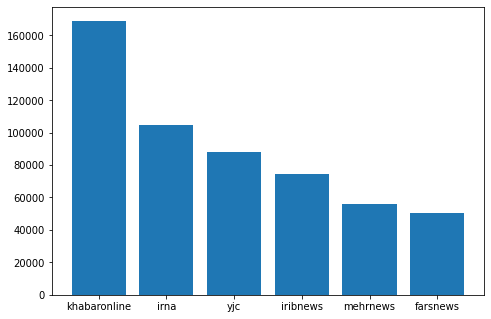

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['khabaronline', 'irna', 'yjc', 'iribnews', 'mehrnews', 'farsnews']
students = [169125,104719,88068,74583,55691,50221]
ax.bar(langs,students)
plt.show()

<div dir='rtl'> میبینیم که خبر آنلاین بیشترین میزان مقالات انتشار شده را دارد و بعد از ایرنا، وای جی سی، آیریب نیوز، مهرنیوز و فارس نیوز ... </div>